In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# Load dataset
file_path = r"E:\Capstone_project_25\dataset_balanced_with_SMOTE.csv"  # Update with your correct path
df = pd.read_csv(file_path)


In [5]:

# Ensure target column exists
if "landslide_occurred" not in df.columns:
    raise ValueError("The dataset must contain 'landslide_occurred' as the target column.")


In [6]:

# Separate features and target
X = df.drop(columns=["landslide_occurred"])
y = df["landslide_occurred"]


In [7]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, use_label_encoder=False, eval_metric="logloss")


In [8]:

# Train the model
xgb_model.fit(X_train, y_train)


C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [03:37:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [9]:

# Make predictions
y_pred = xgb_model.predict(X_test)


In [10]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")


XGBoost Model Accuracy: 0.7846


In [11]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[194  53]
 [ 56 203]]


In [12]:

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       247
           1       0.79      0.78      0.79       259

    accuracy                           0.78       506
   macro avg       0.78      0.78      0.78       506
weighted avg       0.78      0.78      0.78       506



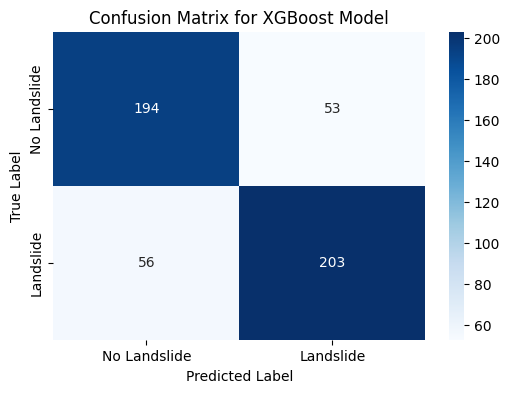

In [13]:

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Landslide", "Landslide"], yticklabels=["No Landslide", "Landslide"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()


Improving accuracy by hyperparameter tuning for XGBoost model approach

In [14]:

# Hyperparameter tuning for XGBoost
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

grid_search = GridSearchCV(xgb.XGBClassifier(objective="binary:logistic", random_state=42, use_label_encoder=False, eval_metric="logloss"), 
                           param_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [03:39:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [15]:

# Best parameters & final model evaluation
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}


In [16]:

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Optimized XGBoost Accuracy: {best_accuracy:.4f}")


Optimized XGBoost Accuracy: 0.7964


In [17]:

# Confusion Matrix for Optimized Model
best_conf_matrix = confusion_matrix(y_test, y_pred_best)
print("\nOptimized Confusion Matrix:\n", best_conf_matrix)



Optimized Confusion Matrix:
 [[194  53]
 [ 50 209]]


In [18]:

# Classification Report for Optimized Model
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_best))



Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       247
           1       0.80      0.81      0.80       259

    accuracy                           0.80       506
   macro avg       0.80      0.80      0.80       506
weighted avg       0.80      0.80      0.80       506



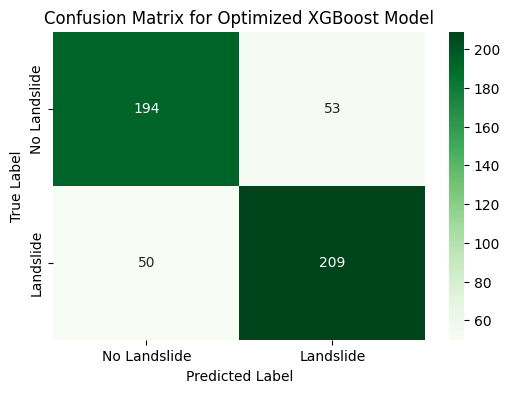

In [19]:

# Visualize Optimized Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["No Landslide", "Landslide"], yticklabels=["No Landslide", "Landslide"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Optimized XGBoost Model")
plt.show()


Selecting XBoost model  , as it is balanced , have better accuracy as well .